In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from itertools import product
import statsmodels.api
from sklearn.metrics import mean_squared_error, r2_score
import math
from statistics import mean

In [2]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sn
warnings.filterwarnings("ignore")

In [3]:
import yfinance as yf
data = yf.download('TSLA', start = '2024-01-01', end = '2025-01-01')
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200
2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600
2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300
2024-01-05,237.490005,240.119995,234.899994,236.860001,92488900
2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600


In [4]:
data.columns = [col[1] if col[0] == 'TSLA' else col[0] for col in data.columns]
data.reset_index(inplace = True)
data.head()

,Date,Close,High,Low,Open,Volume
0,2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200
1,2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600
2,2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300
3,2024-01-05,237.490005,240.119995,234.899994,236.860001,92488900
4,2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

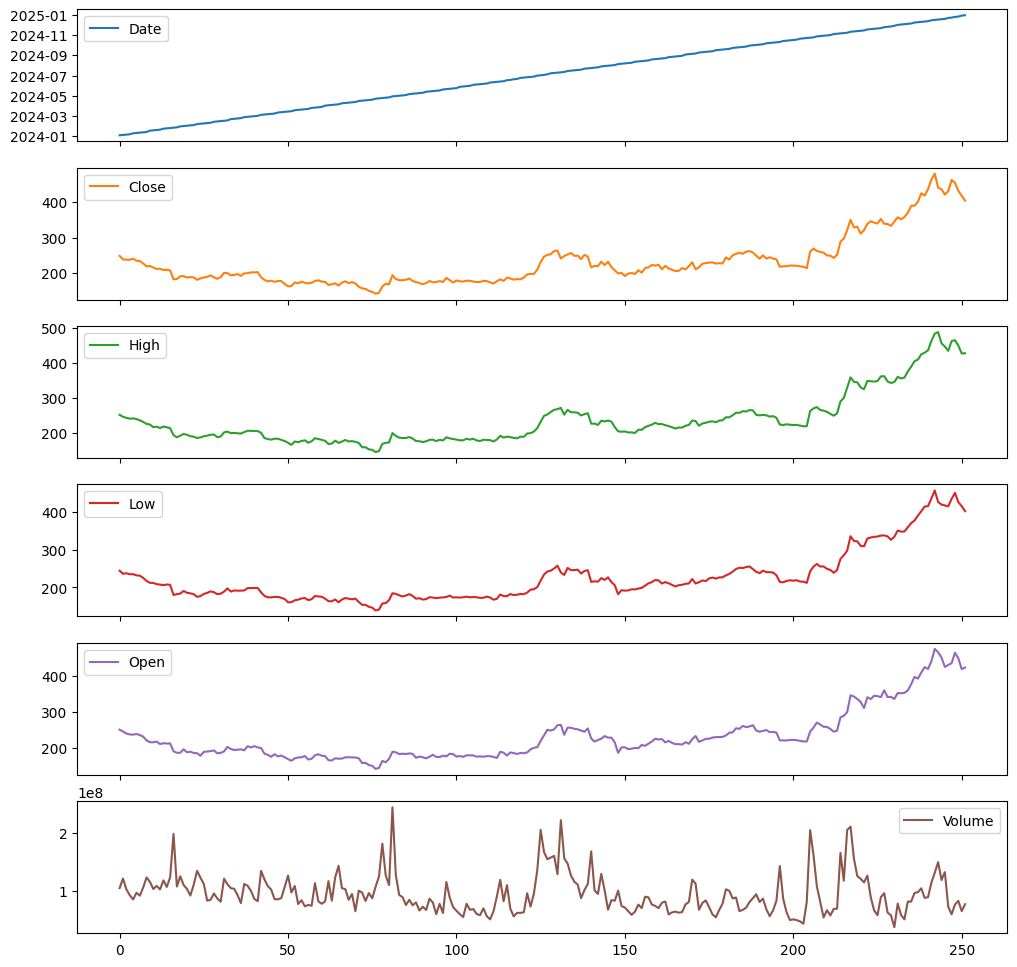

In [5]:
data.plot(kind = "line", figsize = (12, 12), subplots = True)

In [6]:
adf_result_1 = adfuller(data["Close"])
print("Close")
print(f"ADF Statistics: {adf_result_1[0]}")
print(f"p-value: {adf_result_1[1]}\n")

adf_result_2 = adfuller(data["High"])
print("High")
print(f"ADF Statistics: {adf_result_2[0]}")
print(f"p-value: {adf_result_2[1]}\n")

adf_result_3 = adfuller(data["Low"])
print("Low")
print(f"ADF Statistics: {adf_result_3[0]}")
print(f"p-value: {adf_result_3[1]}\n")

adf_result_4 = adfuller(data["Open"])
print("Open")
print(f"ADF Statistics: {adf_result_4[0]}")
print(f"p-value: {adf_result_4[1]}\n")

adf_result_5 = adfuller(data["Volume"])
print("Volume")
print(f"ADF Statistics: {adf_result_5[0]}")
print(f"p-value: {adf_result_5[1]}")

Close
ADF Statistics: 0.22758300159103304
p-value: 0.973766893762248

High
ADF Statistics: 0.2431516862686881
p-value: 0.9745806024766258

Low
ADF Statistics: 0.06928703522778107
p-value: 0.9639005291027621

Open
ADF Statistics: 0.558499532572705
p-value: 0.9865467683441755

Volume
ADF Statistics: -7.554260190093292
p-value: 3.129693283161665e-11


In [7]:
adf_result_1 = adfuller(data["Close"].diff()[1:])
print("Close")
print(f"ADF Statistics: {adf_result_1[0]}")
print(f"p-value: {adf_result_1[1]}\n")

adf_result_2 = adfuller(data["High"].diff()[1:])
print("High")
print(f"ADF Statistics: {adf_result_2[0]}")
print(f"p-value: {adf_result_2[1]}\n")

adf_result_3 = adfuller(data["Low"].diff()[1:])
print("Low")
print(f"ADF Statistics: {adf_result_3[0]}")
print(f"p-value: {adf_result_3[1]}\n")

adf_result_4 = adfuller(data["Open"].diff()[1:])
print("Open")
print(f"ADF Statistics: {adf_result_4[0]}")
print(f"p-value: {adf_result_4[1]}\n")

adf_result_5 = adfuller(data["Volume"].diff()[1:])
print("Volume")
print(f"ADF Statistics: {adf_result_5[0]}")
print(f"p-value: {adf_result_5[1]}")

Close
ADF Statistics: -14.785733568169617
p-value: 2.2101001919989776e-27

High
ADF Statistics: -12.771781916836769
p-value: 7.742898248284161e-24

Low
ADF Statistics: -4.419796347731779
p-value: 0.00027378117398537647

Open
ADF Statistics: -15.34816579836939
p-value: 3.7513937170266835e-28

Volume
ADF Statistics: -8.825824073923087
p-value: 1.8248127062058603e-14


In [8]:
series = data[["Close", "High", "Low", "Open", "Volume"]]
for i in range(len(series.columns)):
    for j in range(len(series.columns)):
        if i != j:
            test = grangercausalitytests(series[[series.columns[i], series.columns[j]]], maxlag = 6)
            print(f"Granger causality test: {series.columns[i]} --> {series.columns[j]}\n")
            # print(test)
        


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0195  , p=0.8890  , df_denom=248, df_num=1
ssr based chi2 test:   chi2=0.0198  , p=0.8882  , df=1
likelihood ratio test: chi2=0.0198  , p=0.8882  , df=1
parameter F test:         F=0.0195  , p=0.8890  , df_denom=248, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5938  , p=0.5530  , df_denom=245, df_num=2
ssr based chi2 test:   chi2=1.2119  , p=0.5456  , df=2
likelihood ratio test: chi2=1.2090  , p=0.5464  , df=2
parameter F test:         F=0.5938  , p=0.5530  , df_denom=245, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9912  , p=0.3976  , df_denom=242, df_num=3
ssr based chi2 test:   chi2=3.0595  , p=0.3825  , df=3
likelihood ratio test: chi2=3.0409  , p=0.3854  , df=3
parameter F test:         F=0.9912  , p=0.3976  , df_denom=242, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.2325  , p=0.2977  

In [14]:
data1=data[["Close", "Volume"]]
data1.shape

(252, 2)

In [15]:
train = data1[: -52]
test = data1[-52:]
test.shape
train.shape

(200, 2)

In [16]:
model = VAR(train.diff()[1:])

In [17]:
sorted_order = model.select_order(maxlags = 20)
sorted_order.summary()

,AIC,BIC,FPE,HQIC
0,38.24,38.28*,4.068e+16,38.26
1,38.18,38.29,3.829e+16,38.23*
2,38.17,38.35,3.783e+16,38.24
3,38.16,38.41,3.739e+16,38.26
4,38.18,38.50,3.827e+16,38.31
5,38.12*,38.51,3.599e+16*,38.28
6,38.14,38.60,3.652e+16,38.32
7,38.17,38.70,3.770e+16,38.38
8,38.19,38.79,3.838e+16,38.43
9,38.20,38.88,3.904e+16,38.48


In [18]:
var_model = VARMAX(train, order = (8, 0), enforce_stationarity = True)
fit = var_model.fit()
fit.summary()

Dep. Variable:,"['Close', 'Volume']",No. Observations:,200
Model:,VAR(8),Log Likelihood,-4349.124
,+ intercept,AIC,8772.248
Date:,"Tue, 18 Nov 2025",BIC,8894.286
Time:,22:59:47,HQIC,8821.635
Sample:,0,,
,- 200,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.03, 0.01",Jarque-Bera (JB):,"33.39, 417.99"
Prob(Q):,"0.86, 0.91",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"1.81, 0.84",Skew:,"-0.14, 1.94"


In [22]:
pred = fit.predict(start = len(train), end = len(train) + len(test) -1)
mse = mean_squared_error(test, pred)
r2 = r2_score(test, pred)
print(F"MSE:{mse}, R-squared:{r2}")

MSE:875064139593137.4, R-squared:-1.5165086437361133
